## Data reduction (Self-calibration)

## Data reduction (Self-calibration)

- comparison of DDT data with archival data
|  | PI | Project code | On-source integ. time [hr] | Sensitivity [mJy beam$^{-1}$] |
| :--- | :--- | :--- | :--- | :--- |
| archive | Koyamatsu | 2013.1.01086.S | | | | 
| DDT | Tobin | 2019.A.00034.S | | |

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils import pyplotms
import os
%matplotlib inline


def get_ncol_nrow(nplot, fix_ncol=False, fix_nrow=False):

    if fix_ncol and fix_nrow:
        return int(fix_ncol), int(fix_nrow)

    elif fix_ncol:
        return int(fix_ncol), int(np.ceil(nplot / fix_ncol))

    elif fix_nrow:
        return int(np.ceil(nplot / fix_nrow)), int(fix_nrow)

    else:
        nrow = np.ceil((np.sqrt(nplot)))
        ncol = np.ceil(nplot / nrow)
        return int(ncol), int(nrow)


def plot_amp_prof(vis, field):

    os.environ["GRPC_ENABLE_FORK_SUPPORT"] = "0"

    # caltab = '/raid/work/yamato/eDisk_data/L1489IRS/ALMA_pipeline_reduced_data/try1/L1489IRS_SB2_initcont_rescaled_SB-only_p3.g'
    pms = pyplotms(
        vis=vis,
        plotms_kw={
            "xaxis": "frequency",
            "yaxis": "amplitude",
            "field": field,
            "ydatacolumn": "data",
            "iteraxis": "spw",
            "avgtime": "1e8",
            "avgscan": True,
            "avgbaseline": True,
            "freqframe": "LSRK",
        },
        verbose=False,
    )
    pms.run_plotms()
    pms.load_data()

    ncols, nrows = get_ncol_nrow(nplot=len(pms.data), fix_ncol=3)

    fig = plt.figure(figsize=(ncols * 4.5, nrows * 3.5))

    for i, key in enumerate(pms.data.keys()):
        ax = fig.add_subplot(nrows, ncols, i + 1)

        x = pms.data[key]["data"]["frequency"]
        y = pms.data[key]["data"]["amplitude"]
        ax.scatter(x, y, label=key, s=1.0)
        # ax.set(ylim=(-180, 180))
        ax.grid()
        ax.legend()
        if i == ncols * (nrows - 1):
            ax.set(xlabel="Frequency [GHz]", ylabel="Amplitude [Jy]")


def plot_selfcal_phase(caltab):

    os.environ["GRPC_ENABLE_FORK_SUPPORT"] = "0"

    # caltab = '/raid/work/yamato/eDisk_data/L1489IRS/ALMA_pipeline_reduced_data/try1/L1489IRS_SB2_initcont_rescaled_SB-only_p3.g'
    pms = pyplotms(
        vis=caltab,
        plotms_kw={"xaxis": "time", "yaxis": "phase", "iteraxis": "antenna"},
        verbose=False,
    )
    pms.run_plotms()
    pms.load_data()

    ncols, nrows = get_ncol_nrow(nplot=len(pms.data), fix_ncol=4)

    fig = plt.figure(figsize=(ncols * 4.5, nrows * 3.5))

    for i, key in enumerate(pms.data.keys()):
        ax = fig.add_subplot(nrows, ncols, i + 1)

        x = pms.data[key]["data"]["time"]
        y = pms.data[key]["data"]["phase"]
        ax.scatter(x, y, label=key)
        ax.set(ylim=(-180, 180))
        ax.grid()
        ax.legend()
        if i == ncols * (nrows - 1):
            ax.set(xlabel="Time [MJD]", ylabel="Phase [deg]")

In [4]:
wd = "/raid/work/yamato/eDisk_data/L1489IRS/ALMA_pipeline_reduced_data/try1_nterms1/"
field = 'L1489IRS'

### 1. Data inspection

SB1


E0220 02:06:26.980250517   31026 call.cc:896]                Invalid entry in accept encoding metadata: ' deflate'. Ignoring.
E0220 02:06:26.980307842   31026 call.cc:896]                Invalid entry in accept encoding metadata: ' gzip'. Ignoring.


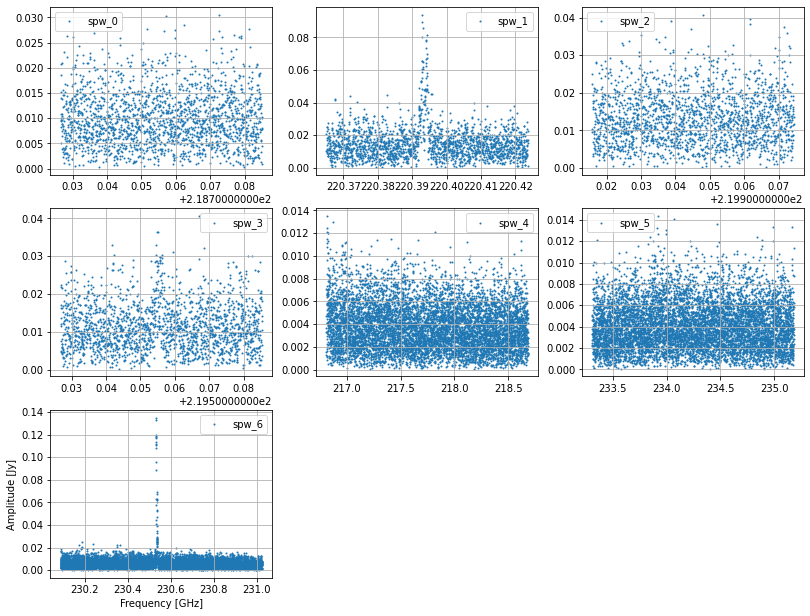

In [4]:
vis = wd + "L1489IRS_SB1.ms"
print('SB1')
plot_amp_prof(vis, field)

SB2


E0220 02:35:55.227870183    2713 call.cc:896]                Invalid entry in accept encoding metadata: ' deflate'. Ignoring.
E0220 02:35:55.227924982    2713 call.cc:896]                Invalid entry in accept encoding metadata: ' gzip'. Ignoring.


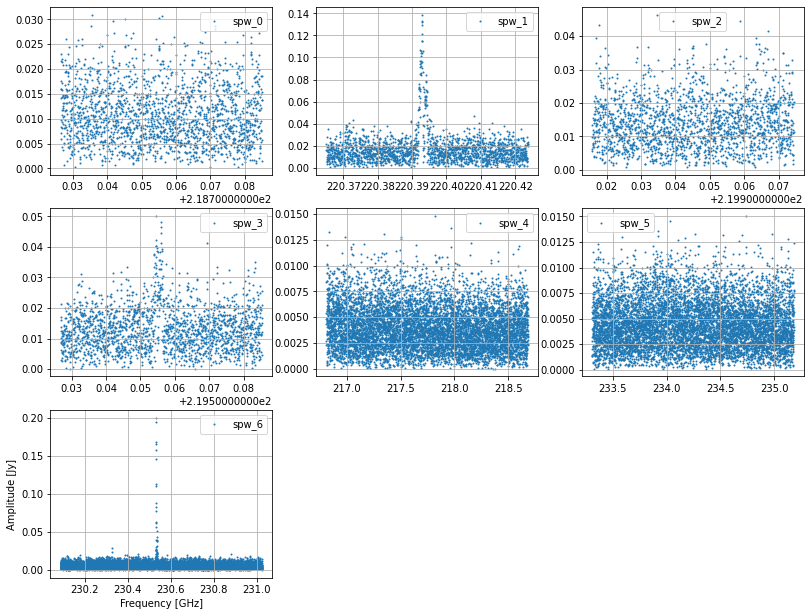

In [4]:
vis = wd + "L1489IRS_SB2.ms"
print('SB2')
plot_amp_prof(vis, field)

In [4]:
vis = wd + "L1489IRS_LB1.ms"
print("LB1")
plot_amp_prof(vis, field)

NameError: name 'wd' is not defined

In [ ]:
vis = wd + "L1489IRS_LB2.ms"
print('LB2')
plot_amp_prof(vis, field)

#### frequency vs. amplitude plot for each spw
- SB1

<img src="./figure/nu_vs_amp_SB1_spw0.png" width="30%"><img src="./figure/nu_vs_amp_SB1_spw1.png" width="30%"><img src="./figure/nu_vs_amp_SB1_spw2.png" width="30%"><img src="./figure/nu_vs_amp_SB1_spw3.png" width="30%"><img src="./figure/nu_vs_amp_SB1_spw4.png" width="30%"><img src="./figure/nu_vs_amp_SB1_spw5.png" width="30%"><img src="./figure/nu_vs_amp_SB1_spw6.png" width="30%">

- SB2

<img src="./figure/nu_vs_amp_SB2_spw0.png" width="30%"><img src="./figure/nu_vs_amp_SB2_spw1.png" width="30%"><img src="./figure/nu_vs_amp_SB2_spw2.png" width="30%"><img src="./figure/nu_vs_amp_SB2_spw3.png" width="30%"><img src="./figure/nu_vs_amp_SB2_spw4.png" width="30%"><img src="./figure/nu_vs_amp_SB2_spw5.png" width="30%"><img src="./figure/nu_vs_amp_SB2_spw6.png" width="30%">

- LB1

<img src="./figure/nu_vs_amp_LB1_spw0.png" width="30%"><img src="./figure/nu_vs_amp_LB1_spw1.png" width="30%"><img src="./figure/nu_vs_amp_LB1_spw2.png" width="30%"><img src="./figure/nu_vs_amp_LB1_spw3.png" width="30%"><img src="./figure/nu_vs_amp_LB1_spw4.png" width="30%"><img src="./figure/nu_vs_amp_LB1_spw5.png" width="30%"><img src="./figure/nu_vs_amp_LB1_spw6.png" width="30%">

- LB2

<img src="./figure/nu_vs_amp_LB2_spw0.png" width="30%"><img src="./figure/nu_vs_amp_LB2_spw1.png" width="30%"><img src="./figure/nu_vs_amp_LB2_spw2.png" width="30%"><img src="./figure/nu_vs_amp_LB2_spw3.png" width="30%"><img src="./figure/nu_vs_amp_LB2_spw4.png" width="30%"><img src="./figure/nu_vs_amp_LB2_spw5.png" width="30%"><img src="./figure/nu_vs_amp_LB2_spw6.png" width="30%">

### Peak position differences between EBs
- crossmark indicates the peak of LB2 (by eye estimate)

<img src="./figure/init_image_peak_comparison_SB1.png" width="50%"><img src="./figure/init_image_peak_comparison_SB2.png" width="50%"><img src="./figure/init_image_peak_comparison_LB1.png" width="50%"><img src="./figure/init_image_peak_comparison_LB2.png" width="50%">

- consistent between LB1 and LB2
- peak position shift between LB and SB ~ 0.04" : probably acceptable
- **peak position shift between SBs ~ 0.1" : acceptable?** -> **after the quick chat with John, this is mitigated after the self-calibration iteration**

### Gaussian fit result

- output on the CASA shell
- fit region : 10" x 10" circle (include outer faint disk)

```
SB1
04h04m43.074796s +26d18m56.07508s
#Peak of Gaussian component identified with imfit: ICRS 04h04m43.074796s +26d18m56.07508s
04h04m43.074796s +26d18m56.07508s
Separation: radian = 7.84038e-08, degrees = 0.000004 = 4.49221e-06, arcsec = 0.016172 = 0.016172
#Peak in J2000 coordinates: 04:04:43.07540, +026:18:56.061095
#PA of Gaussian component: 67.98 deg
#Inclination of Gaussian component: 72.67 deg
#Pixel coordinates of peak: x = 349.228 y = 442.526

SB2
04h04m43.078850s +26d18m56.20286s
#Peak of Gaussian component identified with imfit: ICRS 04h04m43.078850s +26d18m56.20286s
04h04m43.078850s +26d18m56.20286s
Separation: radian = 7.82732e-08, degrees = 0.000004 = 4.48473e-06, arcsec = 0.016145 = 0.016145
#Peak in J2000 coordinates: 04:04:43.07945, +026:18:56.188875
#PA of Gaussian component: 67.56 deg
#Inclination of Gaussian component: 69.07 deg
#Pixel coordinates of peak: x = 347.411 y = 446.785

LB1
04h04m43.079734s +26d18m56.11802s
#Peak of Gaussian component identified with imfit: ICRS 04h04m43.079734s +26d18m56.11802s
04h04m43.079734s +26d18m56.11802s
Separation: radian = 7.84694e-08, degrees = 0.000004 = 4.49597e-06, arcsec = 0.016185 = 0.0161855
#Peak in J2000 coordinates: 04:04:43.08034, +026:18:56.104035
#PA of Gaussian component: 30.25 deg
#Inclination of Gaussian component: 74.27 deg
#Pixel coordinates of peak: x = 470.149 y = 1439.572

LB2
04h04m43.079784s +26d18m56.11749s
#Peak of Gaussian component identified with imfit: ICRS 04h04m43.079784s +26d18m56.11749s
04h04m43.079784s +26d18m56.11749s
Separation: radian = 7.84694e-08, degrees = 0.000004 = 4.49597e-06, arcsec = 0.016185 = 0.0161855
#Peak in J2000 coordinates: 04:04:43.08039, +026:18:56.103505
#PA of Gaussian component: 6.80 deg
#Inclination of Gaussian component: 78.21 deg
#Pixel coordinates of peak: x = 469.925 y = 1439.396
```

- fit region : 0.8" x 0.8"

```
SB1
04h04m43.077567s +26d18m56.07674s
#Peak of Gaussian component identified with imfit: ICRS 04h04m43.077567s +26d18m56.07674s
04h04m43.077567s +26d18m56.07674s
Separation: radian = 7.83711e-08, degrees = 0.000004 = 4.49034e-06, arcsec = 0.016165 = 0.0161652
#Peak in J2000 coordinates: 04:04:43.07817, +026:18:56.062755
#PA of Gaussian component: 41.02 deg
#Inclination of Gaussian component: 39.00 deg
#Pixel coordinates of peak: x = 347.986 y = 442.581

SB2
04h04m43.079789s +26d18m56.15849s
#Peak of Gaussian component identified with imfit: ICRS 04h04m43.079789s +26d18m56.15849s
04h04m43.079789s +26d18m56.15849s
Separation: radian = 7.83058e-08, degrees = 0.000004 = 4.48659e-06, arcsec = 0.016152 = 0.0161517
#Peak in J2000 coordinates: 04:04:43.08039, +026:18:56.144505
#PA of Gaussian component: 64.25 deg
#Inclination of Gaussian component: 29.94 deg
#Pixel coordinates of peak: x = 346.990 y = 445.306

LB1
04h04m43.079734s +26d18m56.11802s
#Peak of Gaussian component identified with imfit: ICRS 04h04m43.079734s +26d18m56.11802s
04h04m43.079734s +26d18m56.11802s
Separation: radian = 7.84694e-08, degrees = 0.000004 = 4.49597e-06, arcsec = 0.016185 = 0.0161855
#Peak in J2000 coordinates: 04:04:43.08034, +026:18:56.104035
#PA of Gaussian component: 30.25 deg
#Inclination of Gaussian component: 74.27 deg
#Pixel coordinates of peak: x = 470.149 y = 1439.572

LB2
04h04m43.079784s +26d18m56.11749s
#Peak of Gaussian component identified with imfit: ICRS 04h04m43.079784s +26d18m56.11749s
04h04m43.079784s +26d18m56.11749s
Separation: radian = 7.84694e-08, degrees = 0.000004 = 4.49597e-06, arcsec = 0.016185 = 0.0161855
#Peak in J2000 coordinates: 04:04:43.08039, +026:18:56.103505
#PA of Gaussian component: 6.80 deg
#Inclination of Gaussian component: 78.21 deg
#Pixel coordinates of peak: x = 469.925 y = 1439.396
```

- **peak positions of SBs are consistent within ~0.04" accuracy : acceptable?**
- peak positions of LBs are consistent 
- adopt LB peak position as the common direction for subsequent analysis

### Align the phase center
- run `fixvis` and `fixplanet`
- following warnings are safe to ignore (see [here](https://docs.google.com/presentation/d/13KXExcNJhfaUW5HKiM5yIYRjgEnwv7HT7xiJhdDsAkc/edit?usp=sharing))

```
SB1
2022-02-08 15:35:57     WARN    fixplanets::::casa      The three FIELD table direction reference frame entries for field 0 are not identical in the input data: 0, 21, 21. Will try to continue ...

SB2
2022-02-08 15:36:09     WARN    fixplanets::::casa      The three FIELD table direction reference frame entries for field 0 are not identical in the input data: 0, 21, 21. Will try to continue ...

LB1
2022-02-08 15:36:51     WARN    fixplanets::::casa      The three FIELD table direction reference frame entries for field 0 are not identical in the input data: 0, 21, 21. Will try to continue ...

LB2
2022-02-08 15:37:46     WARN    fixplanets::::casa      The three FIELD table direction reference frame entries for field 0 are not identical in the input data: 0, 21, 21. Will try to continue ...
```


### After the alignment

<img src="./figure/shift_image_peak_comparison_SB1.png" width="50%"><img src="./figure/shift_image_peak_comparison_SB2.png" width="50%"><img src="./figure/shift_image_peak_comparison_LB1.png" width="50%"><img src="./figure/shift_image_peak_comparison_LB2.png" width="50%">

- crossmark show the peak in LB2 (by eye estimate)
- well aligned within the beam size of each image

```
SB1
04h04m43.079716s +26d18m56.10090s
#Peak of Gaussian component identified with imfit: J2000 04h04m43.079716s +26d18m56.10090s
#PA of Gaussian component: 55.25 deg
#Inclination of Gaussian component: 44.09 deg
#Pixel coordinates of peak: x = 450.129 y = 449.918
Phasecenter new:  04h04m43.079716s +26d18m56.10090s
Phasecenter old:  04h04m43.07817s +026d18m56.062755s

SB2
04h04m43.079791s +26d18m56.11259s
#Peak of Gaussian component identified with imfit: J2000 04h04m43.079791s +26d18m56.11259s
#PA of Gaussian component: 66.47 deg
#Inclination of Gaussian component: 36.51 deg
#Pixel coordinates of peak: x = 450.096 y = 450.308
Phasecenter new:  04h04m43.079791s +26d18m56.11259s
Phasecenter old:  04h04m43.08039s +026d18m56.144505s

LB1
04h04m43.080155s +26d18m56.10281s
#Peak of Gaussian component identified with imfit: J2000 04h04m43.080155s +26d18m56.10281s
#PA of Gaussian component: 28.37 deg
#Inclination of Gaussian component: 63.36 deg
#Pixel coordinates of peak: x = 1499.325 y = 1499.818
Phasecenter new:  04h04m43.080155s +26d18m56.10281s
Phasecenter old:  04h04m43.08034s +026d18m56.104035s

LB2
04h04m43.080102s +26d18m56.10441s
#Peak of Gaussian component identified with imfit: J2000 04h04m43.080102s +26d18m56.10441s
#PA of Gaussian component: 176.35 deg
#Inclination of Gaussian component: 62.01 deg
#Pixel coordinates of peak: x = 1499.559 y = 1500.353
Phasecenter new:  04h04m43.080102s +26d18m56.10441s
Phasecenter old:  04h04m43.08039s +026d18m56.103505s
```

### Deprojected visibility plot
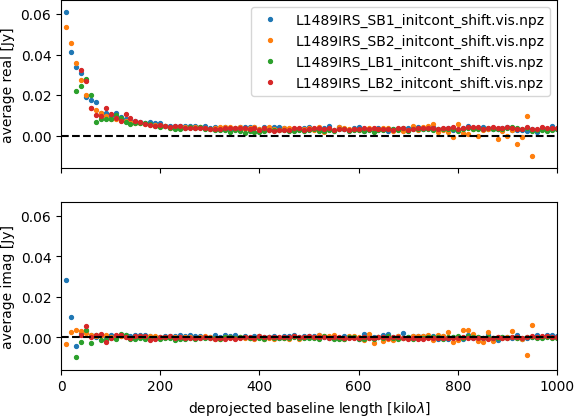

```
SB1
 
SB2
#The ratio of the fluxes of L1489IRS_SB2_initcont_shift.vis.npz to L1489IRS_SB1_initcont_shift.vis.npz is 0.90800
#The scaling factor for gencal is 0.953 for your comparison measurement
#The error on the weighted mean ratio is 2.891e-03, although it's likely that the weights in the measurement sets are off by some constant factor
 
LB1
#The ratio of the fluxes of L1489IRS_LB1_initcont_shift.vis.npz to L1489IRS_SB1_initcont_shift.vis.npz is 0.83612
#The scaling factor for gencal is 0.914 for your comparison measurement
#The error on the weighted mean ratio is 4.563e-03, although it's likely that the weights in the measurement sets are off by some constant factor
 
LB2
#The ratio of the fluxes of L1489IRS_LB2_initcont_shift.vis.npz to L1489IRS_SB1_initcont_shift.vis.npz is 0.93164
#The scaling factor for gencal is 0.965 for your comparison measurement
#The error on the weighted mean ratio is 4.450e-03, although it's likely that the weights in the measurement sets are off by some constant factor
```

- bit large noise at large baselines in SB2 : maybe due to the poorer uv-coverage as indicated by larger beam size
- seems to be acceptable difference between each EB
- use SB1 as reference

- after scaling

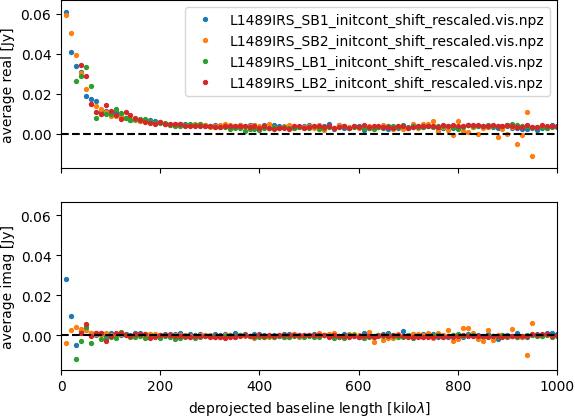

```
#The ratio of the fluxes of L1489IRS_SB2_initcont_shift_rescaled.vis.npz to L1489IRS_SB1_initcont_shift.vis.npz is 1.00000
#The scaling factor for gencal is 1.000 for your comparison measurement
#The error on the weighted mean ratio is 3.184e-03, although it's likely that the weights in the measurement sets are off by some constant factor

#The ratio of the fluxes of L1489IRS_LB1_initcont_shift_rescaled.vis.npz to L1489IRS_SB1_initcont_shift.vis.npz is 1.00000
#The scaling factor for gencal is 1.000 for your comparison measurement
#The error on the weighted mean ratio is 5.458e-03, although it's likely that the weights in the measurement sets are off by some constant factor

#The ratio of the fluxes of L1489IRS_LB2_initcont_shift_rescaled.vis.npz to L1489IRS_SB1_initcont_shift.vis.npz is 1.00000
#The scaling factor for gencal is 1.000 for your comparison measurement
#The error on the weighted mean ratio is 4.777e-03, although it's likely that the weights in the measurement sets are off by some constant factor
```

### Self-calibration with ``nterms=1``

#### 1. SB-only selfcal

- initial dirty map

```python
#L1489IRS_initial.image.tt0
#Beam 0.275 arcsec x 0.181 arcsec (-1.31 deg)
#Flux inside disk mask: 55.49 mJy
#Peak intensity of source: 4.67 mJy/beam
#rms: 4.06e-02 mJy/beam
#Peak SNR: 114.95
```

- suggested self-calibration parameters

```python
Suggested Solints:
['inf', 'inf', '60.48s', '30.24s', '12.10s', 'int']

Suggested Gaincal Combine params:
['spw,scan', 'spw', 'spw', 'spw', 'spw', 'spw']

Suggested nsigma per solint: 
[7.66336815 6.35272422 5.26623598 4.36556671 3.61893632 3.        ]
```

- Iteration note for SB-only selfcal (for `_post` image, see the original script)

| iteration | selfcal mode | solint | combine | nsigma | Beam size <br> [arcsec (deg)] | Total flux <br> [mJy] | Peak intensity <br> [mJy beam$^{-1}$] | rms <br> [mJy beam$^{-1}$] | Peak SNR | 
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| initial dirty  | SB-only, -     | - | - | - | 0.275 x 0.181 (-1.31) | 55.49 | 4.67 | 4.06e-2 | 114.95 |
| 0 (no selfcal) | SB-only, -     | - | - | - | 0.275 x 0.181 (-1.31) | 50.11 | 4.71 | 4.20e-2 | 112.03 |
| 1              | SB-only, phase | inf | spw,scan | 7.66 | 0.275 x 0.181 (-1.31) | 54.20 | 5.08 | 3.78e-2 | 134.50 |
| 2              | SB-only, phase | inf | spw | 6.35 | 0.275 x 0.181 (-1.31) | 58.08 | 5.98 | 3.51e-2 | 170.24 |
| 3              | SB-only, phase | 60.48s | spw | 5.27 | 0.275 x 0.181 (-1.31) | 59.28 | 6.19 | 3.48e-2 | 177.80 | 
| 4              | SB-only, phase | 30.24s | spw | 4.37 | 0.275 x 0.181 (-1.31) | 60.43 | 6.32 | 3.45e-2 | 182.99 | 
| 5              | SB-only, phase | 12s | spw | 3.62 | 0.275 x 0.181 (-1.31) | 62.30 | 6.34 | 3.40e-2 | 186.51 |
| 6              | SB-only, amp | inf | spw | 3.00 | 0.283 x 0.188 (-1.95) | 49.97 | 6.62 | 3.39e-2 | 195.65 |
| 7              | SB-only, amp | 30s | spw | 3.00 | 0.281 x 0.186 (-1.80) | 50.76 | 6.80 | 3.46e-2 | 196.37 |

#### 2. Combined selfcal

- initial dirty map

```python
#L1489IRS_initial_LB+SB.image.tt0
#Beam 0.070 arcsec x 0.040 arcsec (24.62 deg)
#Flux inside disk mask: 119.88 mJy
#Peak intensity of source: 3.40 mJy/beam
#rms: 1.66e-02 mJy/beam
#Peak SNR: 205.35
```

- suggested self-calibration parameters

```python
Suggested Solints:
['inf', 'inf', '18.14s', 'int']

Suggested Gaincal Combine params:
['spw,scan', 'spw', 'spw', 'spw']

Suggested nsigma per solint: 
[13.69031849  8.2537147   4.97605708  3.        ]
```


- Iteration note for combined selfcal (for `_post` image, see the original script)

| iteration | selfcal mode | solint | combine | nsigma | Beam size <br> [arcsec (deg)] | Total flux <br> [mJy] | Peak intensity <br> [mJy beam$^{-1}$] | rms <br> [mJy beam$^{-1}$] | Peak SNR | 
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| initial dirty  | SB+LB, -     | - | - | - | 0.070 x 0.040 (24.62) | 119.88 | 3.40 | 1.66e-2 | 205.35 |
| 0 (no selfcal) | SB+LB, -     | - | - | - | 0.071 x 0.040 (24.56) | 129.52 | 3.60 | 1.68e-2 | 214.92 |
| 1              | SB+LB, phase | - | - | - | 0.071 x 0.040 (24.56) | 125.29 | 4.06 | 1.64e-2 | 248.38 |
| 2              | SB+LB, phase | - | - | - | 0.071 x 0.040 (24.56) | 116.48 | 4.84 | 1.60e-2 | 301.71 |

- automasking could not capture any emission if run `tclean` with default automasking parameters (`sidelobethreshold=2.5, noisethreshold=5.0, lownoisethreshold=1.5, smoothfactor=2.0`) and `nsigma = 13.69`

- instead use `sidelobethreshold=2.0, smoothfactor=1.5, noisethreshold=3.0, smoothfactor=1.5` works well

- following warnings are safe to ignore (see [here](https://edisk.slack.com/archives/CR6AWA733/p1638940350164800))

```
2022-02-09 07:41:41     WARN    task_tclean::SIImageStore::Open existing Images (file casa-source/code/synthesis/ImagerObjects/SIImageStore.cc, line 568)  Mismatch in Csys latpoles between existing image on disk ([61.1785, 26.3156, 180, 26.3156]) and current imaging run ([61.1785, 26.3156, 180, 26.3156]) : The DirectionCoordinates have differing latpoles -- Resetting to match image on disk
2022-02-09 07:41:41     WARN    task_tclean::SIImageStore::Open existing Images (file casa-source/code/synthesis/ImagerObjects/SIImageStore.cc, line 568)  Mismatch in Csys latpoles between existing image on disk ([61.1785, 26.3156, 180, 26.3156]) and current imaging run ([61.1785, 26.3156, 180, 26.3156]) : The DirectionCoordinates have differing latpoles -- Resetting to match image on disk
```

#### Phase gain and antenna plots

##### iteration 0
- Phase gain

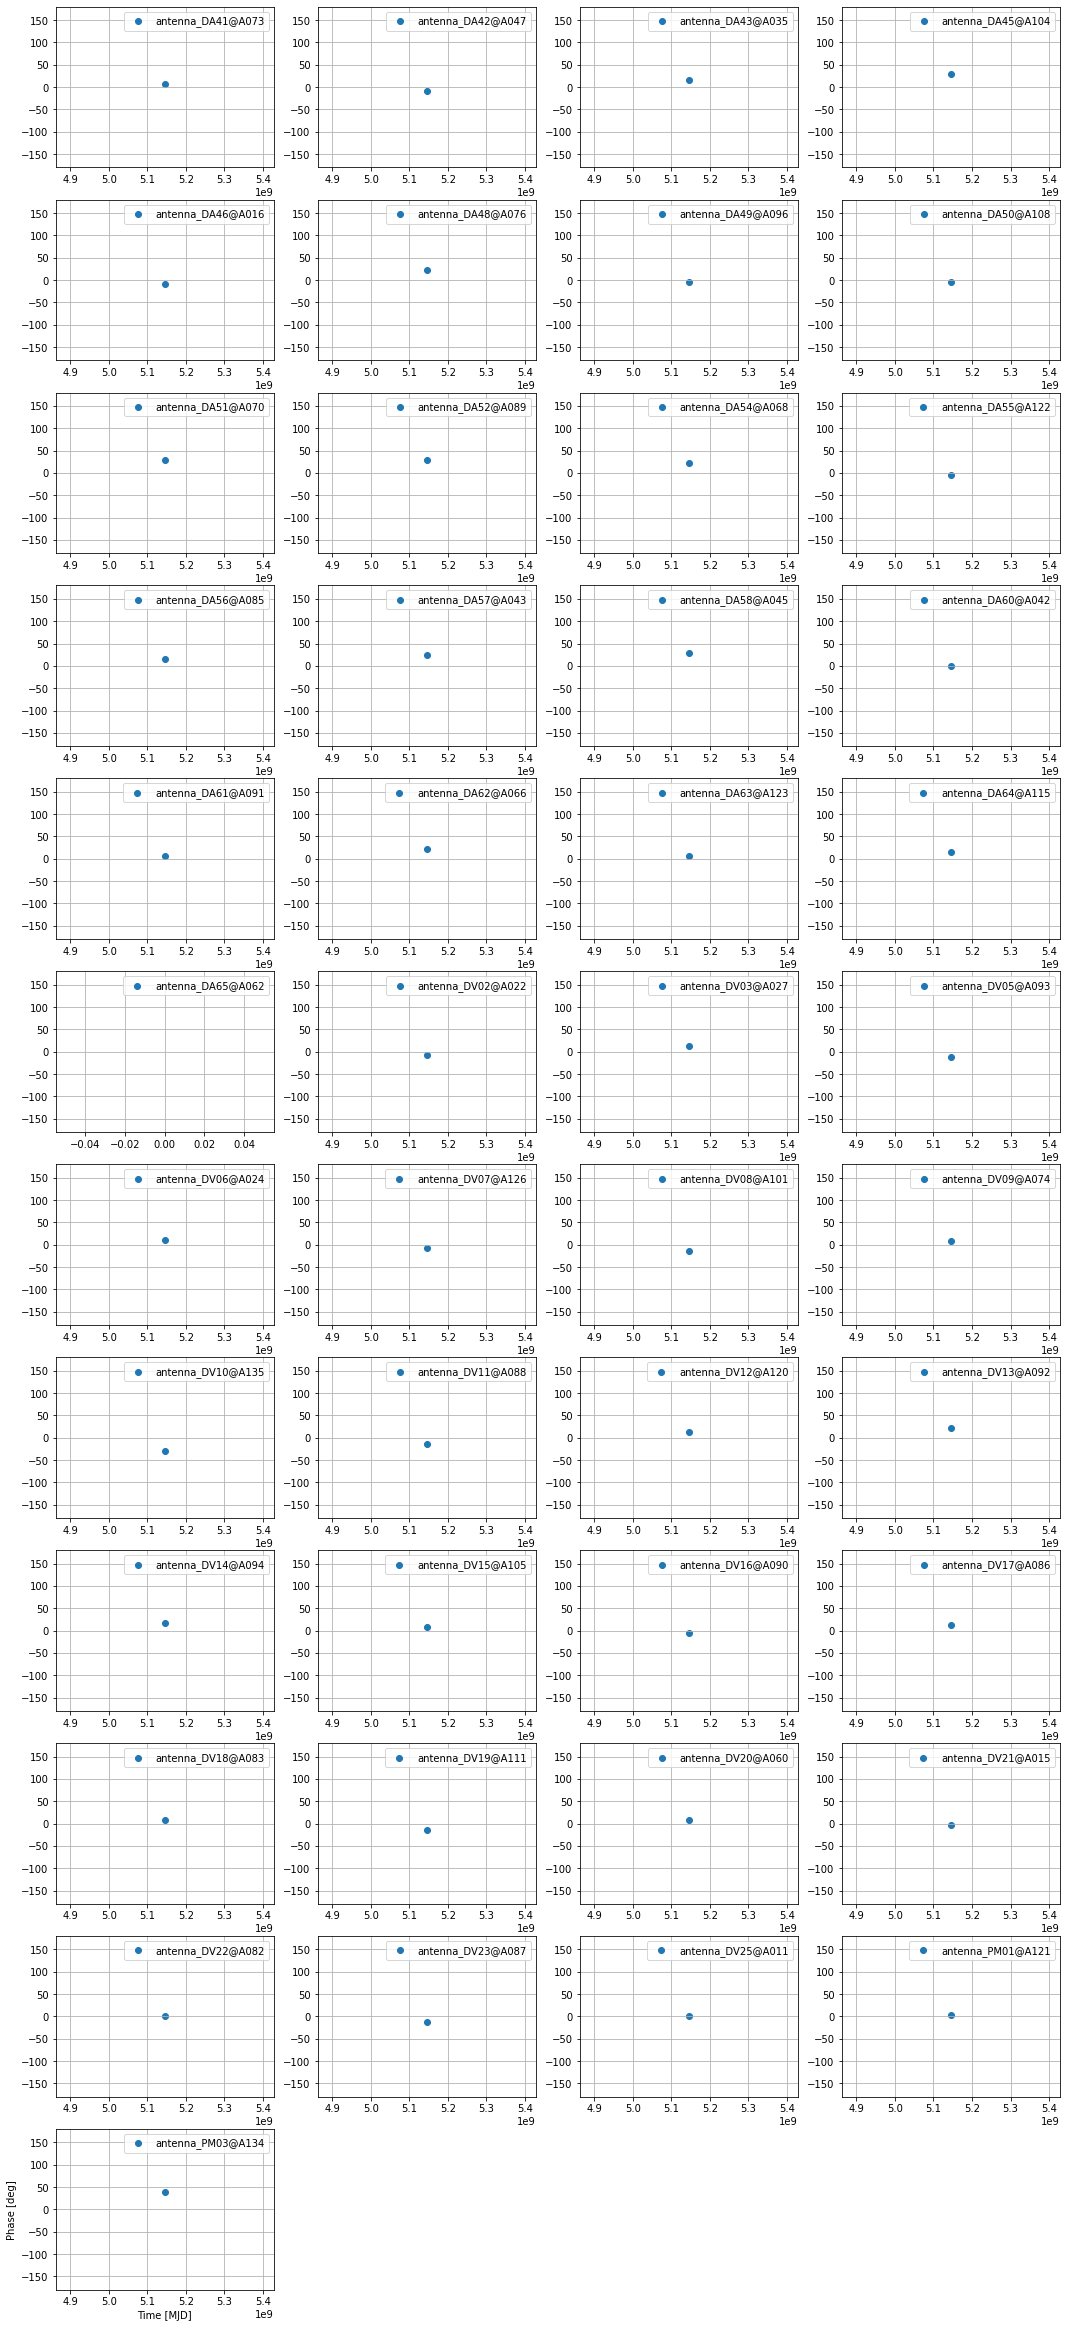

In [8]:
caltab = wd + "L1489IRS_SB1_initcont_rescaled_SB-only_p0.g"
plot_selfcal_phase(caltab)

- Antenna (SB1, SB2)

<img src="./figure/plot_ants_L1489IRS_SB1_initcont_rescaled_SB-only_p0.png" width='50%'><img src="./figure/plot_ants_L1489IRS_SB2_initcont_rescaled_SB-only_p0.png" width='50%'>

- Image, psf

<img src="./figure/L1489IRS_SB-only_p0.image.tt0.png" width="50%"><img src="./figure/L1489IRS_SB-only_p0.psf.tt0.png" width="50%">

- Gain and antenna plots and images
    - SB-only, phase 0
        - SB1
        <img src="./figure/plot_ants_L1489IRS_SB1_initcont_rescaled_SB-only_p0.png">
        <img src="./figure/gain_SB1_SB-only_iteration0_1.png">
        <img src="./figure/gain_SB1_SB-only_iteration0_2.png">
        <img src="./figure/gain_SB1_SB-only_iteration0_3.png">
        
        - SB2
        <img src="./figure/plot_ants_L1489IRS_SB2_initcont_rescaled_SB-only_p0.png">
        <img src="./figure/gain_SB2_SB-only_iteration0_1.png">
        <img src="./figure/gain_SB2_SB-only_iteration0_2.png">
        <img src="./figure/gain_SB2_SB-only_iteration0_3.png">
        
        - image, psf 
        
        <img src="./figure/L1489IRS_SB-only_p0.image.tt0.png" width="50%"><img src="./figure/L1489IRS_SB-only_p0.psf.tt0.png" width="50%">
        
     - SB-only, phase 1
        - SB1
        <img src="./figure/plot_ants_L1489IRS_SB1_initcont_rescaled_SB-only_p1.png">
        <img src="./figure/gain_SB1_SB-only_iteration1_1.png">
        <img src="./figure/gain_SB1_SB-only_iteration1_2.png">
        <img src="./figure/gain_SB1_SB-only_iteration1_3.png">
        
        - SB2
        <img src="./figure/plot_ants_L1489IRS_SB2_initcont_rescaled_SB-only_p1.png">
        <img src="./figure/gain_SB2_SB-only_iteration1_1.png">
        <img src="./figure/gain_SB2_SB-only_iteration1_2.png">
        <img src="./figure/gain_SB2_SB-only_iteration1_3.png">
        - image, psf 
        
        <img src="./figure/L1489IRS_SB-only_p1.image.tt0.png" width="50%"><img src="./figure/L1489IRS_SB-only_p1.psf.tt0.png" width="50%">
        
     - SB-only, phase 2
        - SB1
        <img src="./figure/plot_ants_L1489IRS_SB1_initcont_rescaled_SB-only_p2.png">
        <img src="./figure/gain_SB1_SB-only_iteration2_1.png">
        <img src="./figure/gain_SB1_SB-only_iteration2_2.png">
        <img src="./figure/gain_SB1_SB-only_iteration2_3.png">
        
        - SB2
        <img src="./figure/plot_ants_L1489IRS_SB2_initcont_rescaled_SB-only_p2.png">
        <img src="./figure/gain_SB2_SB-only_iteration2_1.png">
        <img src="./figure/gain_SB2_SB-only_iteration2_2.png">
        <img src="./figure/gain_SB2_SB-only_iteration2_3.png">
        - image, psf 
        
        <img src="./figure/L1489IRS_SB-only_p2.image.tt0.png" width="50%"><img src="./figure/L1489IRS_SB-only_p2.psf.tt0.png" width="50%">
        
     - SB-only, phase 3
        - SB1
        <img src="./figure/plot_ants_L1489IRS_SB1_initcont_rescaled_SB-only_p3.png">
        <img src="./figure/gain_SB1_SB-only_iteration3_1.png">
        <img src="./figure/gain_SB1_SB-only_iteration3_2.png">
        <img src="./figure/gain_SB1_SB-only_iteration3_3.png">
        
        - SB2
        <img src="./figure/plot_ants_L1489IRS_SB2_initcont_rescaled_SB-only_p3.png">
        <img src="./figure/gain_SB2_SB-only_iteration3_1.png">
        <img src="./figure/gain_SB2_SB-only_iteration3_2.png">
        <img src="./figure/gain_SB2_SB-only_iteration3_3.png">
        - image, psf 
        
        <img src="./figure/L1489IRS_SB-only_p3.image.tt0.png" width="50%"><img src="./figure/L1489IRS_SB-only_p3.psf.tt0.png" width="50%">

In [5]:
caltab = wd + "L1489IRS_SB1_initcont_rescaled_LB+SB_p2.g"
plot_selfcal_phase(caltab)

casa.qtapp: cannot connect to X server localhost:13.0
